In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scipy.stats as sps

#import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus

In [2]:
songs = pd.read_csv('../data/SpotifyCleanedClassification.csv')

In [3]:
songs.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


In [4]:
songs_class = songs.copy(deep = True)

In [5]:
songs_class['is_popular'] = 0

In [6]:
popularity_threshold = 40

songs_class.loc[songs_class.popularity > popularity_threshold, "is_popular"] = 1

In [7]:
category_columns = ['genre', 'artist_name', 'track_name', 'key', 'mode', 'time_signature']

for label in category_columns:
    songs_class[label] = LabelEncoder().fit(songs_class[label]).transform(songs_class[label])

In [8]:
## all columns

#['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
#       'acousticness', 'danceability', 'duration_ms', 'energy',
#       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
#       'speechiness', 'tempo', 'time_signature', 'valence']

#features = ['acousticness', 'danceability', 'duration_ms', 'energy',
#       'instrumentalness', 'liveness', 'loudness',
#       'speechiness', 'tempo', 'valence']

features = ['genre', 'artist_name', 'track_name',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']

X = songs_class[features]

y = songs_class.is_popular

In [73]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=131) # 70% training and 30% test

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [41]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7814126574889332


In [83]:
clf.feature_importances_ # Weights of each repsective feature within the classifier

array([0.35175536, 0.05721914, 0.04140276, 0.11472789, 0.0378417 ,
       0.04340543, 0.04128136, 0.04657498, 0.02122703, 0.04295893,
       0.05961844, 0.00385333, 0.05604827, 0.04042238, 0.00227167,
       0.03939134])

In [74]:
regr_1 = DecisionTreeRegressor(max_depth = 1)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [84]:
regr_1.feature_importances_ ## Weights of features

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [85]:
regr_2.feature_importances_ ## Weights of features

array([5.55119788e-01, 3.48145382e-04, 0.00000000e+00, 2.40657732e-01,
       6.69974655e-03, 0.00000000e+00, 9.85603075e-03, 8.59011365e-02,
       0.00000000e+00, 9.32476340e-05, 0.00000000e+00, 0.00000000e+00,
       1.01313968e-01, 1.02052755e-05, 0.00000000e+00, 0.00000000e+00])

In [100]:
#Re-assign Indices
indices = X_test.index
y_1 = pd.DataFrame(y_1, index = indices)
y_2 = pd.DataFrame(y_2, index = indices)

## Build Graphing Dataset
all_test = pd.concat([y_test, y_1, y_2], axis = 1, ignore_index = True)
all_test

## Add ground truth popularity
y_0 = all_test.join(songs_class['popularity']/100) # Divide by 100 because regressor is between 0 and 1
y_0

,0,1,2,popularity
21877,1,0.607569,0.799869,0.46
102882,0,0.607569,0.331834,0.32
136968,0,0.257778,0.001037,0.23
3185,1,0.607569,0.799869,0.65
132678,1,0.257778,0.168568,0.43
...,...,...,...,...
73326,0,0.257778,0.105589,0.10
59077,1,0.607569,0.969458,0.58
73533,0,0.257778,0.105589,0.25
118269,0,0.607569,0.596857,0.36


In [119]:
## Sort by Classification Popularity
y_f = y_0.sort_values(by = ['popularity'])

## y_f is a 44k by 4 dataframe
# Col 0 represents Truth Labels
# Col 1 represents Predictor 1 Values
# Col 2 represents Predcitor 2 Values
# Col 3 represents truth popularity values

Text(0.5, 1.0, 'Predicitve Popularity vs True Popularity')

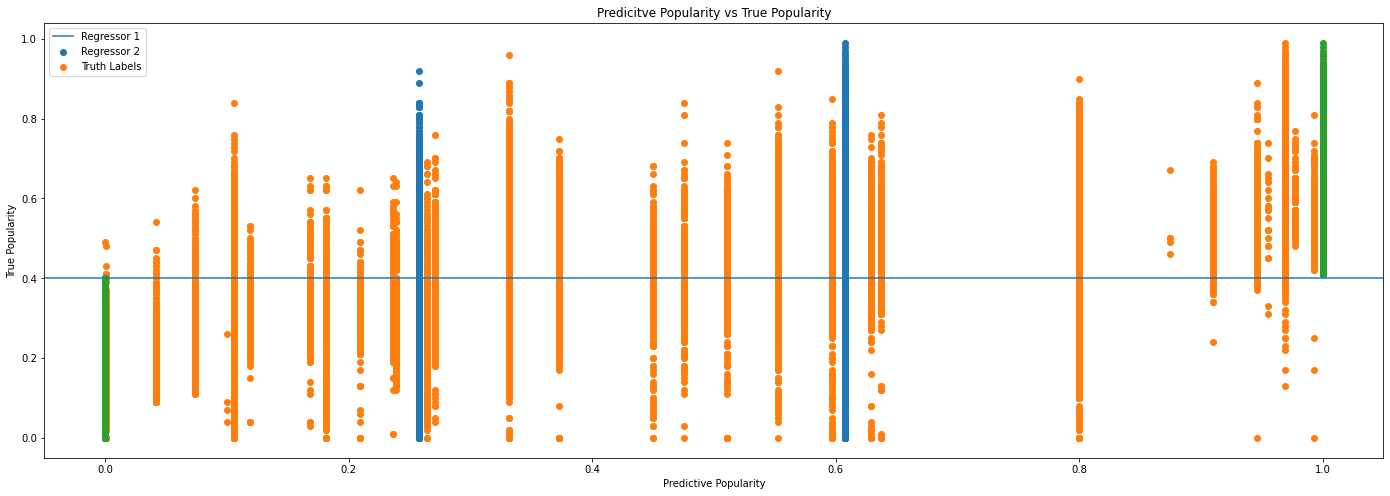

In [132]:
# Exploratory Visualization - A Better one would be helpful
fig, ax = plt.subplots(figsize = (24, 8))
ax.scatter(y_f.iloc[:,1], y_f.iloc[:,3])
ax.scatter(y_f.iloc[:,2], y_f.iloc[:,3])
ax.scatter(y_f.iloc[:,0], y_f.iloc[:,3])
#ax.scatter(y_f.iloc[:,3], y_f.iloc[:,3])
ax.axhline(popularity_threshold/100)
ax.set_xlabel('Predictive Popularity')
ax.set_ylabel('True Popularity')
ax.legend(['Regressor 1', 'Regressor 2', 'Truth Labels'])
ax.set_title('Predicitve Popularity vs True Popularity')

## Not a good visualization but perhaps some info can be understood?

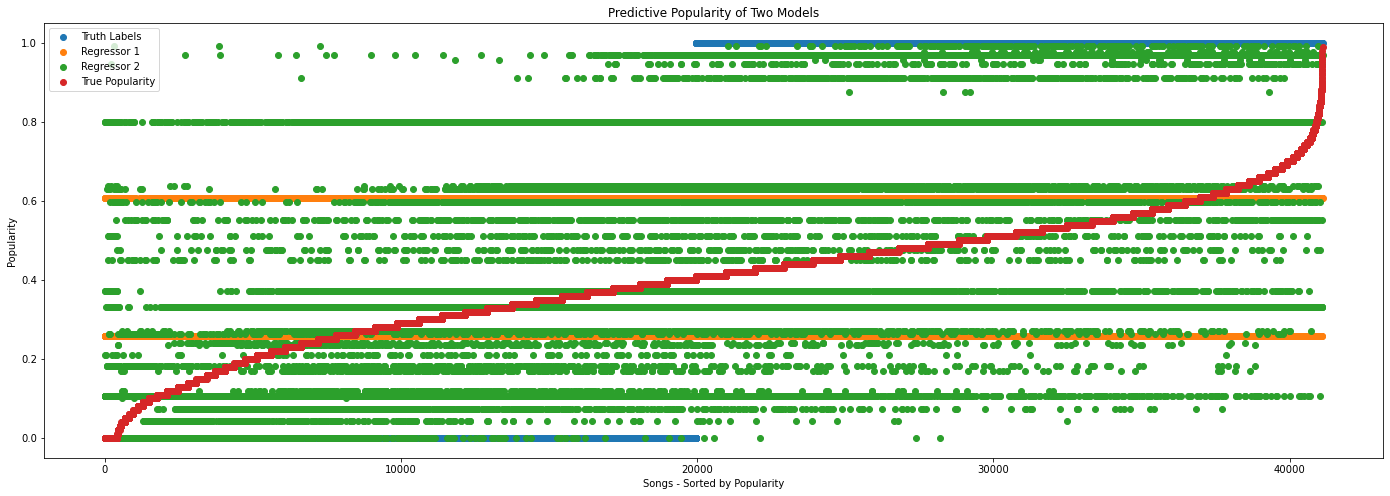

In [133]:
fig1, ax1 = plt.subplots(figsize = (24,8))
eX = np.arange(1,len(y_test)+1,1)
ax1.scatter(eX, y_f.iloc[:,0])
ax1.scatter(eX, y_f.iloc[:,1])
ax1.scatter(eX, y_f.iloc[:,2])
ax1.scatter(eX, y_f.iloc[:,3])

## This is meant to be a 1D graph visualiztion, density graph will probably be better
ax1.set_xlabel('Songs - Sorted by Popularity')
ax1.set_ylabel('Popularity')
ax1.set_title('Predictive Popularity of Two Models')
ax1.legend(['Truth Labels', 'Regressor 1', 'Regressor 2', 'True Popularity'])

In [102]:
# Plot the results
# plt.figure()
# plt.scatter(X_train.track_name[1:20], y_train[1:20], s=20, edgecolor="black", c="darkorange", label="data")
# plt.plot(y_test[1:20], y_1[1:20], color="cornflowerblue", linewidth=2)
# plt.plot(y_test[1:20], y_2[1:20], color="yellowgreen", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Decision Tree Regression")
# plt.legend()
# plt.show()

In [103]:
#plt.scatter(X_train.track_name[1:20], y_train[1:20])